In [0]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)

## Q1:Plot a histogram of the number of training documents for each of the 20 categories.

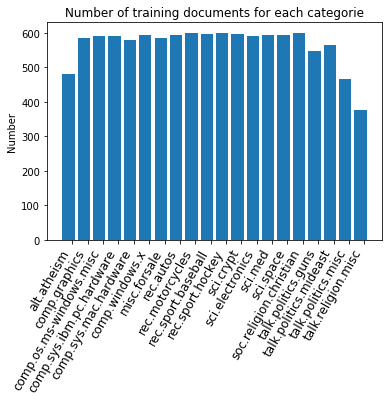

In [0]:
 from sklearn.datasets import fetch_20newsgroups
 newsgroups_histogram = fetch_20newsgroups(subset = 'train')
 from pprint import pprint
 import matplotlib as plt
 dataset = fetch_20newsgroups(subset = 'train')
 dataset_cat = [['alt.atheism'],['comp.graphics'],['comp.os.ms-windows.misc'],['comp.sys.ibm.pc.hardware'],
                ['comp.sys.mac.hardware'],['comp.windows.x'],['misc.forsale'],['rec.autos'],['rec.motorcycles'],
                ['rec.sport.baseball'],['rec.sport.hockey'],['sci.crypt'],['sci.electronics'],['sci.med'],
                ['sci.space'],['soc.religion.christian'],['talk.politics.guns'],['talk.politics.mideast'],
                ['talk.politics.misc'],['talk.religion.misc']]
 number = []
 ##pprint(list(dataset.target_names))
 for i in range(20):
   temp = len(fetch_20newsgroups(subset = 'train',categories = dataset_cat[i],shuffle = True).data)
   number.append(temp)
 ##print(number)
 fig,ax = plt.pyplot.subplots()
 ax.set_title('Number of training documents for each categorie')
 ax.set_ylabel('Number')
 ax.set_xticks([i + 0.25 for i in range(1, 21)])
 ax.set_xticklabels(['alt.atheism','comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware',
                'comp.sys.mac.hardware','comp.windows.x','misc.forsale','rec.autos','rec.motorcycles',
                'rec.sport.baseball','rec.sport.hockey','sci.crypt','sci.electronics','sci.med',
                'sci.space','soc.religion.christian','talk.politics.guns','talk.politics.mideast',
                'talk.politics.misc','talk.religion.misc'], rotation=60, ha='right', fontsize=12)
 plt.pyplot.bar([i for i in range(1,21)],number,width=0.8)
 plt.pyplot.show()

## Q2: Report the shape of the TF-IDF matrices of the train and test subsets respectively.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('stopwords')
import re
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']

train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = 42,remove=('headers', 'footers'))
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = 42,remove=('headers', 'footers'))

##from pprint import pprint
##pprint(list(train_dataset.target_names))

stopwords = nltk.corpus.stopwords.words('english')

def my_tag(tag):
    mytag = {'NN':'n', 'NNS':'n','NNP':'n','NNPS':'n',
             'JJ':'a','JJR':'a','JJS':'a',
             'VB':'v', 'VBD':'v','VBG':'v,','VBN':'v','VBP':'v','VBZ':'v',
             'RB':'r','RBR':'r','RBS':'r'}
    try:
        return mytag[tag[:2]]
    except:
        return 'n'

def tokenization(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word not in stopwords]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

def parse(text):
    lem = WordNetLemmatizer()
    output = []
    for word, tag in pos_tag(tokenization(text)):
        output.append(lem.lemmatize(word.lower(), pos=my_tag(tag)))
    return output

train_lemmatized = []
for item in train_dataset.data:
    train_lemmatized.append(' ' .join(parse(item)))

test_lemmatized = []
for item in test_dataset.data:
    test_lemmatized.append(' ' .join(parse(item)))

vectorizer = CountVectorizer(min_df=3, stop_words='english')
transformer = TfidfTransformer()

train_counts = vectorizer.fit_transform(train_lemmatized)
test_counts = vectorizer.transform(test_lemmatized)

train_tf_idf = transformer.fit_transform(train_counts)
test_tf_idf = transformer.transform(test_counts)

print('train_tf_idf:',train_tf_idf.shape)
print('test_tf_idf:', test_tf_idf.shape)

train_dataset.target

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
train_tf_idf: (4732, 14186)
test_tf_idf: (3150, 14186)


array([6, 7, 4, ..., 6, 6, 2])

## Q3:Reduce the dimensionality of the data using LSI and NMF

In [0]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.utils.extmath import randomized_svd
import pandas as pd

svd = TruncatedSVD(n_components = 50, n_iter = 20,random_state = 42)
svd_train = svd.fit_transform(train_tf_idf)
svd_test = svd.transform(test_tf_idf)

print ('LSI method:')
print ('train: ', svd_train.shape)
print ('')
print('test: ', svd_test.shape)
print('')

nmf = NMF(n_components=50, init='random', random_state=42)
nmf_train = nmf.fit_transform(train_tf_idf)
nmf_test = nmf.transform(test_tf_idf)
print ('NMF method:')
print ('train: ', nmf_train.shape)
print ('')
print('test: ', nmf_test.shape)
print ('')

u,s,v_trans = randomized_svd(train_tf_idf,n_components=50)
temp = np.dot(u,np.diag(s))
x_svd = np.dot(temp,v_trans)
temp1 = np.square(train_tf_idf - x_svd)
temp2 = np.sum(temp1)
lsi_f_norm = np.sqrt(temp2)
print("Frobenius Norm squared for LSI: " + str(round(lsi_f_norm,3)))

WH = np.dot(nmf_train, nmf.components_)
temp3 = np.square(train_tf_idf - WH)
temp4 = np.sum(temp3)
nmf_f_norm = np.sqrt(temp4)
print("Frobenius Norm squared for NMF: " + str(round(nmf_f_norm,3)))



LSI method:
train:  (4732, 50)

test:  (3150, 50)

NMF method:
train:  (4732, 50)

test:  (3150, 50)

Frobenius Norm squared for LSI: 63.844
Frobenius Norm squared for NMF: 64.204


## Q4: Hard margin and soft margin linear SVMs


hard accuracy:0.9714285714285714
soft accuracy:0.5047619047619047
hard recall:0.9735849056603774
soft recall:1.0
hard precision:0.9699248120300752
soft precision:0.5047619047619047
hard F1-score:0.9717514124293785
soft F1-score:0.6708860759493671
hard Confusion Matrix: 
[[1512   48]
 [  42 1548]]
soft Confusion Matrix: 
[[   0 1560]
 [   0 1590]]


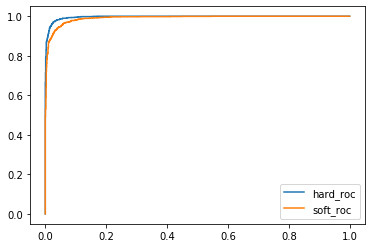

0.9731612681417451
{'C': 10.0}
best accuracy:0.966984126984127
best recall:0.9767295597484277
best precision:0.9586419753086419
best F1-score:0.9676012461059189
best Confusion Matrix: 
[[1493   67]
 [  37 1553]]


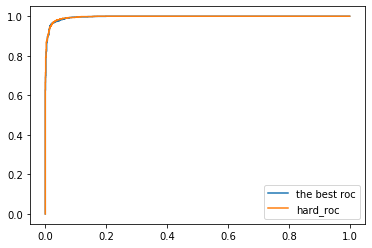

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import math
import pandas as pd


y_train = train_dataset.target.copy()
y_test = test_dataset.target.copy()

for i in range(0,len(y_train)):
  y_train[i] = y_train[i] // 4

for i in range(0,len(y_test)):
  y_test[i] = y_test[i] // 4


hard_svm = SVC(C=1000, kernel = 'linear')
soft_svm = SVC(C=0.0001, kernel = 'linear')

hard_svm.fit(svd_train, y_train)
soft_svm.fit(svd_train, y_train)

hard_score = hard_svm.decision_function(svd_test)
hard_predicted = hard_svm.predict(svd_test)
soft_score = soft_svm.decision_function(svd_test)
soft_predicted = soft_svm.predict(svd_test)

print("hard accuracy:{}".format(accuracy_score(y_test, hard_predicted)))
print("soft accuracy:{}".format(accuracy_score(y_test, soft_predicted)))

print("hard recall:{}".format(recall_score(y_test, hard_predicted)))
print("soft recall:{}".format(recall_score(y_test, soft_predicted)))

print("hard precision:{}".format(precision_score(y_test, hard_predicted)))
print("soft precision:{}".format(precision_score(y_test, soft_predicted)))

print("hard F1-score:{}".format(f1_score(y_test, hard_predicted)))
print("soft F1-score:{}".format(f1_score(y_test, soft_predicted)))

print("hard Confusion Matrix: \n{}".format(confusion_matrix(y_test, hard_predicted)))
print("soft Confusion Matrix: \n{}".format(confusion_matrix(y_test, soft_predicted)))

hard_fpr, hard_tpr, hard_thresholds = roc_curve(y_test,hard_score)
soft_fpr, soft_tpr, soft_thresholds = roc_curve(y_test,soft_score)

hard_x = hard_fpr
hard_y = hard_tpr

soft_x = soft_fpr
soft_y = soft_tpr

plt.plot(hard_x,hard_y,label = 'hard_roc')
plt.plot(soft_x,soft_y,label = 'soft_roc')
plt.legend(loc = 'lower right')
plt.show()

parameters = {'C':[math.pow(10, k) for k in range(-3,4)]}
svm_cv = SVC()
cv = GridSearchCV(svm_cv,parameters,cv = 5,scoring='accuracy')
grid_result = cv.fit(svd_train, y_train)

print(grid_result.best_score_)
print(grid_result.best_params_)

best_svm = SVC(C=10, kernel='linear')
best_svm.fit(svd_train, y_train)
best_score = best_svm.decision_function(svd_test)
best_predicted = best_svm.predict(svd_test)
print("best accuracy:{}".format(accuracy_score(y_test, best_predicted)))
print("best recall:{}".format(recall_score(y_test, best_predicted)))
print("best precision:{}".format(precision_score(y_test, best_predicted)))
print("best F1-score:{}".format(f1_score(y_test, best_predicted)))
print("best Confusion Matrix: \n{}".format(confusion_matrix(y_test, best_predicted)))
best_fpr, best_tpr, best_thresholds = roc_curve(y_test,best_score)
best_x = best_fpr
best_y = best_tpr
plt.plot(best_x,best_y,label = 'the best roc')
plt.plot(hard_x,hard_y,label = 'hard_roc')
plt.legend(loc = 'lower right')
plt.show()


## Q5: Logistic Regression


logistic regression accuracy:0.9707936507936508
logistic regression recall:0.9761006289308176
logistic regression precision:0.9663760896637609
logistic_regression F1-score:0.9712140175219023
logistic_regression Confusion Matrix: 
[[1506   54]
 [  38 1552]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


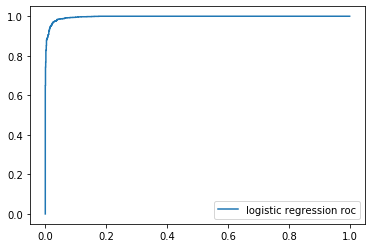

L1:  0.9712596359707188
L1:  {'C': 10.0}
L2:  0.9699911370278012
L2:  {'C': 100.0}
logistic regression L1 accuracy:0.9711111111111111
logistic regression L2 accuracy:0.9698412698412698
logistic regression L1 recall:0.9761006289308176
logistic regression L2 recall:0.9767295597484277
logistic regression L1 precision:0.9669781931464174
logistic regression L2 precision:0.9639975170701428
logistic regression L1 F1-score:0.9715179968701095
logistic regression L2 F1-score:0.9703217744454857
logistic regression L1 Confusion Matrix: 
[[1507   53]
 [  38 1552]]
logistic regression L2 Confusion Matrix: 
[[1502   58]
 [  37 1553]]
no pen coef:  [[-5.64777035e+00  1.06593932e+02  3.51798247e+01 -4.96823393e+01
  -7.22663498e+00 -1.11959435e+01 -3.57678296e+01  5.21019392e+01
  -1.29880188e+01  2.87070492e+01  2.34475130e+00 -1.26298645e+01
  -1.47618375e+01  9.44112209e+00 -1.61983108e+01  1.27804958e+01
  -2.05643694e+01 -6.51814088e+00  1.70943725e+01  2.71933341e+01
   1.05296644e+01 -2.04221495

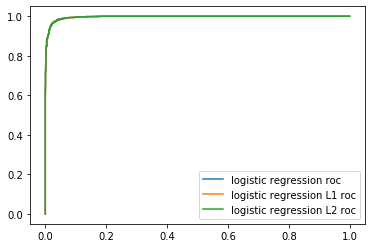

No Regularization AUC:  0.9965344299306562
L1 AUC:  0.99632760845025
L2 AUC:  0.996306644089663


In [0]:
from sklearn import linear_model, metrics

log_reg = linear_model.LogisticRegression(penalty='none')
log_reg.fit(svd_train, y_train)

log_reg_score = log_reg.decision_function(svd_test)
log_reg_predicted = log_reg.predict(svd_test)


print("logistic regression accuracy:{}".format(accuracy_score(y_test, log_reg_predicted)))
print("logistic regression recall:{}".format(recall_score(y_test, log_reg_predicted)))
print("logistic regression precision:{}".format(precision_score(y_test, log_reg_predicted)))
print("logistic_regression F1-score:{}".format(f1_score(y_test, log_reg_predicted)))
print("logistic_regression Confusion Matrix: \n{}".format(confusion_matrix(y_test, log_reg_predicted)))
log_reg_fpr, log_reg_tpr, log_reg_thresholds = roc_curve(y_test,log_reg_score)
log_reg_x = log_reg_fpr
log_reg_y = log_reg_tpr
plt.plot(log_reg_x,log_reg_y,label = 'logistic regression roc')
plt.legend(loc = 'lower right')
plt.show()

parameters = {'C':[math.pow(10, k) for k in range(-3,4)]}
log_reg_cv1 = linear_model.LogisticRegression(penalty = 'l1',solver='liblinear')
cv1 = GridSearchCV(log_reg_cv1,parameters,scoring = 'accuracy',cv = 5)
grid_result1 = cv1.fit(svd_train, y_train)

print('L1: ', grid_result1.best_score_)
print('L1: ', grid_result1.best_params_)

log_reg_cv2 = linear_model.LogisticRegression(penalty = 'l2',solver='liblinear')
cv2 = GridSearchCV(log_reg_cv2,parameters,scoring = 'accuracy',cv = 5)
grid_result2 = cv2.fit(svd_train, y_train)

print('L2: ', grid_result2.best_score_)
print('L2: ', grid_result2.best_params_)

log_reg_L1 = linear_model.LogisticRegression(C=10,penalty='l1',solver='liblinear')
log_reg_L2 = linear_model.LogisticRegression(C=100,penalty='l2',solver='liblinear')
log_reg_L1.fit(svd_train, y_train)
log_reg_L2.fit(svd_train, y_train)
log_reg_L1_score = log_reg_L1.decision_function(svd_test)
log_reg_L2_score = log_reg_L2.decision_function(svd_test)
log_reg_L1_predicted = log_reg_L1.predict(svd_test)
log_reg_L2_predicted = log_reg_L2.predict(svd_test)


print("logistic regression L1 accuracy:{}".format(accuracy_score(y_test, log_reg_L1_predicted)))
print("logistic regression L2 accuracy:{}".format(accuracy_score(y_test, log_reg_L2_predicted)))
print("logistic regression L1 recall:{}".format(recall_score(y_test, log_reg_L1_predicted)))
print("logistic regression L2 recall:{}".format(recall_score(y_test, log_reg_L2_predicted)))
print("logistic regression L1 precision:{}".format(precision_score(y_test, log_reg_L1_predicted)))
print("logistic regression L2 precision:{}".format(precision_score(y_test, log_reg_L2_predicted)))
print("logistic regression L1 F1-score:{}".format(f1_score(y_test, log_reg_L1_predicted)))
print("logistic regression L2 F1-score:{}".format(f1_score(y_test, log_reg_L2_predicted)))
print("logistic regression L1 Confusion Matrix: \n{}".format(confusion_matrix(y_test, log_reg_L1_predicted)))
print("logistic regression L2 Confusion Matrix: \n{}".format(confusion_matrix(y_test, log_reg_L2_predicted)))
print('no pen coef: ', log_reg.coef_)
print('L1 coef: ', log_reg_L1.coef_ )
print('L2 coef: ', log_reg_L2.coef_)
log_reg_L1_fpr, log_reg_L1_tpr, log_reg_L1_thresholds = roc_curve(y_test,log_reg_L1_score)
log_reg_L2_fpr, log_reg_L2_tpr, log_reg_L2_thresholds = roc_curve(y_test,log_reg_L2_score)
log_reg_L1_x = log_reg_L1_fpr
log_reg_L1_y = log_reg_L1_tpr
log_reg_L2_x = log_reg_L2_fpr
log_reg_L2_y = log_reg_L2_tpr
plt.plot(log_reg_x,log_reg_y,label = 'logistic regression roc')
plt.plot(log_reg_L1_x,log_reg_L1_y,label = 'logistic regression L1 roc')
plt.plot(log_reg_L2_x,log_reg_L2_y,label = 'logistic regression L2 roc')
plt.legend(loc = 'lower right')
plt.show()

print('No Regularization AUC: ', auc(log_reg_x,log_reg_y))
print('L1 AUC: ', auc(log_reg_L1_x,log_reg_L1_y))
print('L2 AUC: ', auc(log_reg_L2_x,log_reg_L2_y))

## Q6: Naïve Bayes classifier

In [0]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB().fit(svd_train, y_train)
NB_predicted = NB.predict(svd_test)
NB_score = NB.predict_proba(svd_test)

print("Naive Bayes accuracy:{}".format(accuracy_score(y_test, NB_predicted)))
print("Naive Bayes recall:{}".format(recall_score(y_test, NB_predicted)))
print("Naive Bayes precision:{}".format(precision_score(y_test, NB_predicted)))
print("Naive Bayes F1-score:{}".format(f1_score(y_test, NB_predicted)))
print("Naive Bayes Confusion Matrix: \n{}".format(confusion_matrix(y_test, NB_predicted)))

NB_fpr, NB_tpr, NB_thresholds = roc_curve(y_test,NB_score[:,1])
NB_x = NB_fpr
NB_y = NB_tpr
plt.plot(NB_x,NB_y,label = 'Naive Bayes roc')
plt.legend(loc = 'lower right')
plt.show()

## Q7: Grid search of parameters:

In [0]:
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

testing_pipeline = Pipeline([
    ('vector', CountVectorizer(min_df=3, stop_words='english')),
    ('tf-idf', TfidfTransformer()), 
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('classify', SVC(C=10, kernel = 'linear')),    
])

tune = [
    {
        'vector__min_df': [3,5],
        'reduce_dim': [TruncatedSVD(n_components=50, random_state=42),
                       NMF(n_components=50, init='random', random_state=42)],
        'classify': [SVC(C=10, kernel = 'linear'),
                     linear_model.LogisticRegression(penalty='l1', random_state=42, solver='liblinear', C=10),
                     linear_model.LogisticRegression(penalty='l2', random_state=42, solver='liblinear', C=100)]
    }
]

cv_q7 = GridSearchCV(testing_pipeline, cv=5, n_jobs=-1, param_grid=tune, scoring='accuracy')
search_result1 = cv_q7.fit(train_lemmatized, y_train)

pd.DataFrame(search_result1.cv_results_)







,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classify,param_reduce_dim,param_vector__min_df,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.803438,0.016305,0.224764,0.018839,"SVC(C=10, break_ties=False, cache_size=200, cl...","TruncatedSVD(algorithm='randomized', n_compone...",3,"{'classify': SVC(C=10, break_ties=False, cache...",0.960929,0.974657,0.965116,0.958774,0.972516,0.966398,0.006250,5
1,1.667700,0.033924,0.236621,0.024582,"SVC(C=10, break_ties=False, cache_size=200, cl...","TruncatedSVD(algorithm='randomized', n_compone...",5,"{'classify': SVC(C=10, break_ties=False, cache...",0.961985,0.969377,0.963002,0.958774,0.971459,0.964919,0.004747,6
2,22.014548,3.613801,0.359369,0.016885,"SVC(C=10, break_ties=False, cache_size=200, cl...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",3,"{'classify': SVC(C=10, break_ties=False, cache...",0.939810,0.964097,0.946089,0.939746,0.963002,0.950549,0.010868,11
3,19.258032,0.155226,0.331616,0.023585,"SVC(C=10, break_ties=False, cache_size=200, cl...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",5,"{'classify': SVC(C=10, break_ties=False, cache...",0.945090,0.963041,0.948203,0.937632,0.955603,0.949914,0.008738,12
4,1.457320,0.060111,0.183906,0.008885,"LogisticRegression(C=10, class_weight=None, du...","TruncatedSVD(algorithm='randomized', n_compone...",3,"{'classify': LogisticRegression(C=10, class_we...",0.966209,0.975713,0.966173,0.959831,0.970402,0.967666,0.005253,4
5,1.343036,0.053739,0.174858,0.009237,"LogisticRegression(C=10, class_weight=None, du...","TruncatedSVD(algorithm='randomized', n_compone...",5,"{'classify': LogisticRegression(C=10, class_we...",0.968321,0.976769,0.965116,0.960888,0.970402,0.968299,0.005314,1
6,20.865843,3.679664,0.271256,0.018891,"LogisticRegression(C=10, class_weight=None, du...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",3,"{'classify': LogisticRegression(C=10, class_we...",0.957761,0.970433,0.957717,0.961945,0.969345,0.963440,0.005496,7
7,19.169047,0.342875,0.254569,0.009813,"LogisticRegression(C=10, class_weight=None, du...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",5,"{'classify': LogisticRegression(C=10, class_we...",0.956705,0.967265,0.955603,0.961945,0.967230,0.961750,0.004975,8
8,1.515193,0.039821,0.180806,0.008838,"LogisticRegression(C=100, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...",3,"{'classify': LogisticRegression(C=100, class_w...",0.965153,0.977825,0.965116,0.960888,0.970402,0.967877,0.005818,3
9,1.402735,0.036079,0.177111,0.012913,"LogisticRegression(C=100, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...",5,"{'classify': LogisticRegression(C=100, class_w...",0.965153,0.978881,0.965116,0.959831,0.971459,0.968088,0.006534,2


In [0]:
pd.DataFrame(search_result1.cv_results_)['']

## Q8: 

In [0]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('stopwords')
import re
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

category = ['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']

train_dataset = fetch_20newsgroups(subset = 'train', categories = category, shuffle = True, random_state = 42,remove=('headers', 'footers'))
test_dataset = fetch_20newsgroups(subset = 'test', categories = category, shuffle = True, random_state = 42,remove=('headers', 'footers'))

stopwords = nltk.corpus.stopwords.words('english')

def my_tag(tag):
    mytag = {'NN':'n', 'NNS':'n','NNP':'n','NNPS':'n',
             'JJ':'a','JJR':'a','JJS':'a',
             'VB':'v', 'VBD':'v','VBG':'v,','VBN':'v','VBP':'v','VBZ':'v',
             'RB':'r','RBR':'r','RBS':'r'}
    try:
        return mytag[tag[:2]]
    except:
        return 'n'

def tokenization(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word not in stopwords]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

def parse(text):
    lem = WordNetLemmatizer()
    output = []
    for word, tag in pos_tag(tokenization(text)):
        output.append(lem.lemmatize(word.lower(), pos=my_tag(tag)))
    return output

train_lemmatized = []
for item in train_dataset.data:
    train_lemmatized.append(' ' .join(parse(item)))

test_lemmatized = []
for item in test_dataset.data:
    test_lemmatized.append(' ' .join(parse(item)))

vectorizer = CountVectorizer(min_df=3, stop_words='english')
transformer = TfidfTransformer()

train_counts = vectorizer.fit_transform(train_lemmatized)
test_counts = vectorizer.transform(test_lemmatized)

train_tf_idf = transformer.fit_transform(train_counts)
test_tf_idf = transformer.transform(test_counts)

svd = TruncatedSVD(n_components = 50, n_iter = 20,random_state = 42)
lsi_train = svd.fit_transform(train_tf_idf)
lsi_test = svd.transform(test_tf_idf)
    
Classifier_list = [OneVsOneClassifier(GaussianNB()), OneVsOneClassifier(SVC(C=10, kernel = 'linear')), OneVsRestClassifier(GaussianNB()), OneVsRestClassifier(SVC(C=10, kernel = 'linear'))]
Classifier_name = ['Naive Bayes (One vs One)', 'SVM (One vs One)','Naive Bayes (One vs Rest)', 'SVM (One vs Rest)']
   

for Classifier,Classifier_n in zip(Classifier_list,Classifier_name):
    print(Classifier_n)
    Classifier.fit(lsi_train, train_dataset.target)
    test_predicted = Classifier.predict(lsi_test)

    print("Accuracy:{}".format(accuracy_score(test_dataset.target, test_predicted)))
    print("Recall:{}".format(recall_score(test_dataset.target, test_predicted,average=None)))
    print("Precision:{}".format(precision_score(test_dataset.target, test_predicted,average=None)))
    print("F1-score:{}".format(f1_score(test_dataset.target, test_predicted,average=None)))
    print("Confusion Matrix: \n{}".format(confusion_matrix(test_dataset.target, test_predicted)))
    print('\n')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Naive Bayes (One vs One)
Accuracy:0.670926517571885
Recall:[0.59693878 0.36883117 0.72564103 0.98241206]
Precision:[0.61096606 0.7244898  0.56039604 0.81288981]
F1-score:[0.60387097 0.48881239 0.63240223 0.88964733]
Confusion Matrix: 
[[234  34 107  17]
 [ 94 142 108  41]
 [ 55  20 283  32]
 [  0   0   7 391]]


SVM (One vs One)
Accuracy:0.8485623003194889
Recall:[0.81122449 0.76883117 0.85897436 0.95226131]
Precision:[0.7535545  0.80216802 0.85897436 0.98697917]